# Deriving and Communicating Insights with Data Visualization
## Part 1: Exploratory Data Analysis of Prosper Loan Data
### Jong Min Lee

In [1]:
# import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid', {'grid.linestyle': 'dotted'})

## Exploratory Data Analysis
Clean version of the Prosper loan data was imported from the `prosperLoanData_clean.csv` file available in the local `data/` directory. Preliminary review of the data types of the columns in this dataset showed that the data types of the three columns, `Term`, `ListingCategory`, and `CreditScoreRange`, are no longer categorical variables. 

In [2]:
# load .csv file containing the clean version of Prosper loan data
df = pd.read_csv('data/prosperLoanData_clean.csv')

In [3]:
# summary of dataframe object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95381 entries, 0 to 95380
Data columns (total 15 columns):
ListingKey                    95381 non-null object
Term                          95381 non-null int64
BorrowerAPR                   95381 non-null float64
ListingCategory               95381 non-null int64
BorrowerState                 95381 non-null object
EmploymentStatus              95381 non-null object
EmploymentStatusDuration      95381 non-null int64
TotalCreditLinespast7years    95381 non-null int64
TotalInquiries                95381 non-null int64
DelinquenciesLast7Years       95381 non-null int64
BankcardUtilization           95381 non-null float64
DebtToIncomeRatio             95381 non-null float64
StatedMonthlyIncome           95381 non-null float64
LoanOriginalAmount            95381 non-null float64
CreditScoreRange              95381 non-null object
dtypes: float64(5), int64(6), object(4)
memory usage: 10.9+ MB


In [4]:
# first five rows of dataframe object
df.head()

,ListingKey,Term,BorrowerAPR,ListingCategory,BorrowerState,EmploymentStatus,EmploymentStatusDuration,TotalCreditLinespast7years,TotalInquiries,DelinquenciesLast7Years,BankcardUtilization,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,CreditScoreRange
0,1021339766868145413AB3B,36,0.16516,0,CO,Self-employed,2,12,3,4,0.00,0.17,3083.33,9425.0,640-659
1,10273602499503308B223C1,36,0.12016,2,CO,Employed,44,29,5,0,0.21,0.18,6125.00,10000.0,680-699
2,0EF5356002482715299901A,36,0.12528,16,GA,Employed,113,29,1,14,0.04,0.15,2875.00,10000.0,800-819
3,0F023589499656230C5E3E2,36,0.24614,2,MN,Employed,44,49,9,0,0.81,0.26,9583.33,15000.0,680-699
4,0F05359734824199381F61D,60,0.15425,1,NM,Employed,82,49,2,0,0.39,0.36,8333.33,15000.0,740-759


### 0. Data Wrangling
The data types of the three columns, `Term`, `ListingCategory`, and `CreditScoreRange`, were changed again to categorical variables by re-applying the appropriate cleaning operations from __Part 0: Data Wrangling__.

In [5]:
# ordered list of unique values in Term
terms = list(df.Term.unique())
terms.sort()

# convert data type of Term to (ordered) category
loan_terms = pd.api.types.CategoricalDtype(ordered = True, categories = terms)
df.Term = df.Term.astype(loan_terms)

# verify that data type of Term is (ordered) category
df.Term.dtype

CategoricalDtype(categories=[12, 36, 60], ordered=True)

In [6]:
# ordered list of unique values in ListingCategory
categories = list(df.ListingCategory.unique())
categories.sort()

# convert data type of ListingCategory to (nominal) category
listing_categories = pd.api.types.CategoricalDtype(categories = categories)
df.ListingCategory = df.ListingCategory.astype(listing_categories)

# verify that data type of ListingCategory is (nominal) category
df.ListingCategory.dtype

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                  18, 19, 20],
                 ordered=False)

In [7]:
# ordered list of unique values in CreditScoreRange
ranges = list(df.CreditScoreRange.unique())
ranges.sort()

# convert data type of CreditScoreRange to (ordinal) category
creditscore_ranges = pd.api.types.CategoricalDtype(ordered = True, categories = ranges)
df.CreditScoreRange = df.CreditScoreRange.astype(creditscore_ranges)

# verify that data type of CreditScoreRange is (ordinal) category
df.CreditScoreRange.dtype

CategoricalDtype(categories=['520-539', '540-559', '560-579', '580-599', '600-619',
                  '620-639', '640-659', '660-679', '680-699', '700-719',
                  '720-739', '740-759', '760-779', '780-799', '800-819',
                  '820-839', '840-859', '860-879', '880-899'],
                 ordered=True)

### 1. Univariate Exploration
#### 1.1 Borrower's APR
Because the data analysis in this project aims to explore the correlations of the main features selected from the raw dataset during the data wrangling phase with borrowers' APRs, the distribution of the borrowers' APRs was first examined with a histogram and a box plot.

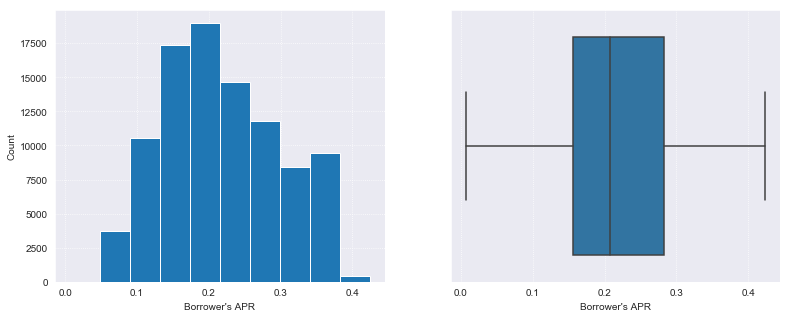

In [8]:
# distribution of borrowers' APRs for default bin size
plt.figure(figsize = (13, 5))

plt.subplot(1,2,1) # first of two subplots arranged in 1-by-2
plt.hist(data = df, x = 'BorrowerAPR'); # histogram of lengths
plt.xlabel('Borrower\'s APR')
plt.ylabel('Count')

plt.subplot(1,2,2) # second of two subplots arranged in 1-by-2
sns.boxplot(data = df, x = 'BorrowerAPR') # box plot of lengths
plt.xlabel('Borrower\'s APR');

According to the box plot on the left of the above figure, the median of the distribution of borrowers' APRs is approximately 0.2, slightly closer to the left than the right end of the range. Although the box plot suggests that the distribution is right-skewed, the histogram on the left of the above figure shows that approximately 10,000 listings show APRs between approximately 0.34 and 0.38. This frequency significantly drops to less than 1,000 listings for APRs above 0.38.

#### 1.2 Categorical Variables
Next, bar plots were used to individually explore the categorical variables or features with qualitative data. Two objects, `base_color` and `total_listings`, were pre-defined and applied to the univariate explorations for these features. `base_color` was used to apply the same color to all categories in a bar plot created with `seaborn`. `total_listings` was used in the calculation of the proportion of each category in a bar plot. 

In [9]:
base_color = sns.color_palette()[0] # base color to be applied to all bars in bar plots
total_listings = df.shape[0] # total number of listings

__1.2.1 Term__

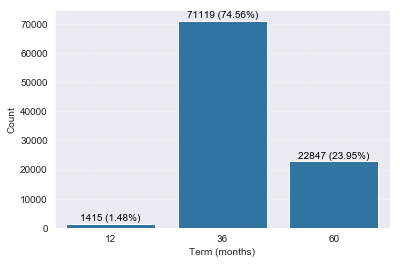

In [10]:
# profile of terms for Prosper loans

# bar plot of number of loans for each term
sns.countplot(data = df, x = 'Term', color = base_color)
plt.xlabel('Term (months)')
plt.ylabel('Count')

# retrieve locations and labels of xticks
locs, labels = plt.xticks()

# series that list number of loans for each term
term_counts = df.Term.value_counts()

for loc, label in zip(locs, labels):
    # number of loan for the given term
    term_count = term_counts[int(label.get_text())] # indices of term_counts series are integers, not strings
    
    # calculate the proportion of each term in % [format: term count (proportion)]
    term_proportion = '{} ({:0.2f}%)'.format(term_count, 100*term_count/total_listings)
    
    # annotate the proportion of the term at the top of its corresponding bar
    plt.text(x = loc, y = term_count + 1000, s = term_proportion, ha = 'center', color = 'black', fontsize = 10);

According to the bar plot above, 74.56% of loans for borrowers using Prosper were offered for a length of 36 months. Loans with a length of 60 months were less than a third of this proportion. Year-long loans were only 1.48% of all the loans offered in Prosper.

__1.2.2 Listing Category__

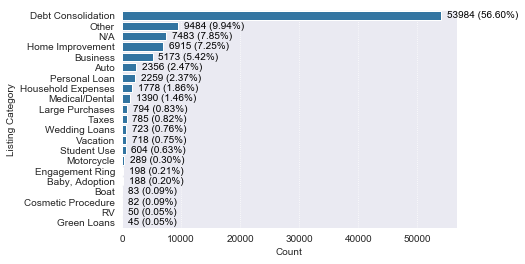

In [11]:
# profile of listing categories for Prosper loans

# horizontal bar plot of number of loans for each type of listing
category_codes = df.ListingCategory.value_counts().index
sns.countplot(data = df, y = 'ListingCategory', color = base_color
              , order = category_codes); # listing categories in descending order of number of loans
plt.xlabel('Count')
plt.ylabel('Listing Category')

# convert listing category codes to descriptions
locs = plt.yticks()[0]
category_dict = {0:'N/A', 1:'Debt Consolidation', 2:'Home Improvement', 3:'Business', 4:'Personal Loan', 5:'Student Use'
              , 6:'Auto', 7:'Other', 8:'Baby, Adoption', 9:'Boat', 10:'Cosmetic Procedure', 11:'Engagement Ring'
              , 12:'Green Loans', 13:'Household Expenses', 14:'Large Purchases', 15:'Medical/Dental', 16:'Motorcycle'
              , 17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'} # as defined in data_dictionary.xlsx
labels = [category_dict[category_code] for category_code in category_codes]
plt.yticks(locs, labels);

# series that list number of loans for each category
category_counts = df.ListingCategory.value_counts()

for loc, label in zip(locs, category_codes):
    # number of loan for the given category
    category_count = category_counts[label] # indices of term_counts series are integers, not strings
    
    # calculate the proportion of each category in % [format: category count (proportion)]
    category_proportion = '{} ({:0.2f}%)'.format(category_count, 100*category_count/total_listings)
    
    # annotate the proportion of the category to the right of its corresponding bar
    plt.text(y = loc, x = category_count + 1000, s = category_proportion, va = 'center', color = 'black', fontsize = 10);

56.6% of all the listings created in Prosper were for debt consolidation, which, according to [Prosper](https://www.prosper.com/plp/loans/loan-types/debt-consolidation-loans/), is consolidating all high interest loans into a single loan and saving on the amount of interest charged on a monthly basis. This proportion of loans aiming to consolidate debt is in fact larger than the sum of proportions of all loans for the other 20 categories. This listing category in Prosper may be particularly popular among the borrowers because of the fixed interest rate offered by Prosper for debt consolidation, an offering which contributes to lowering the loan principal as the borrower makes his or her loan payments.

The next most frequently observed type of listings were those for categories other than the ones offered in Prosper, the porportion of which was only 9.94%, less than a fifth of the proportion of the most popular listing category. The least frequently observed category was Green Loans, a type of loan offered by [Prosper](https://www.prosper.com/plp/loans/loan-types/green-loans/) to fund initial technological costs associated with implementing green energy initiatives.

__1.2.3 Borrower State__

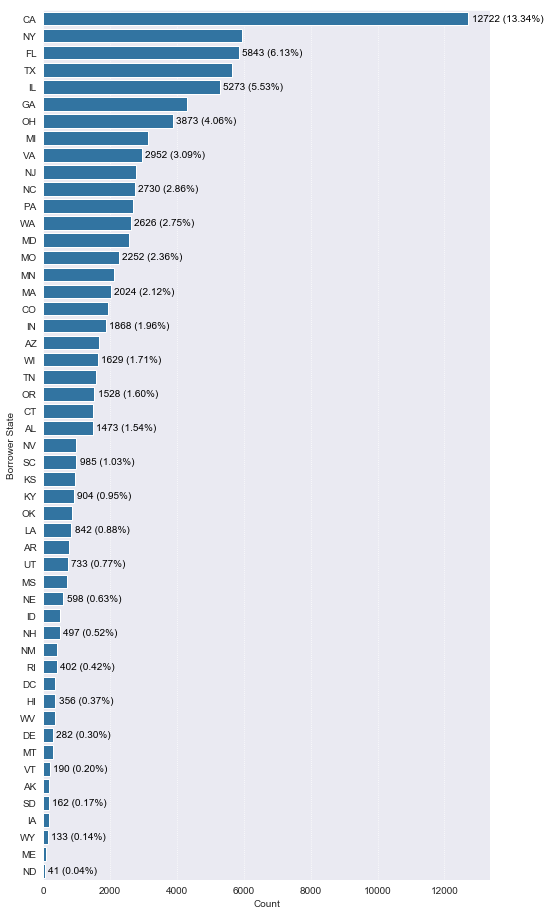

In [12]:
# states of borrowers' addresses

# horizontal bar plot of number of listings from each state
states = df.BorrowerState.value_counts().index
plt.figure(figsize = (8, 16))
sns.countplot(data = df, y = 'BorrowerState', color = base_color
              , order = states); # states in descending order of number of listings
plt.xlabel('Count')
plt.ylabel('Borrower State')

# retrieve locations of yticks
locs = plt.yticks()[0]

# number of listings in descending order for each state
state_counts = df.BorrowerState.value_counts()

# for every other states
for loc, state in zip(locs, states):
    if loc % 2 == 0:
        # number of listings for the given state
        state_count = state_counts[state]
        
        # calculate the proportion of each state in % [format: state count (proportion)]
        state_proportion = '{} ({:0.2f}%)'.format(state_count, 100*state_count/total_listings)
        
        # annotate the proportion of the state to the right of its corresponding bar
        plt.text(x = state_count + 100, y = loc, s = state_proportion, va = 'center', color = 'black', fontsize = 10)

13.34% of all the listings created in Prosper were for borrowers with addresses in California. The large number of listings created for borrowers in this state may be attributed to the fact that Prosper is based in San Francisco, California. The next most commonly observed states were New York and Florida; however, the proportions of listings created for borrowers in each of these two states were approximately 6.13%, almost half the proportion observed for California. The proportion gradually decreased for the remaining states with North Dakota showing only 0.04%.

__1.2.4 Status of Employment__

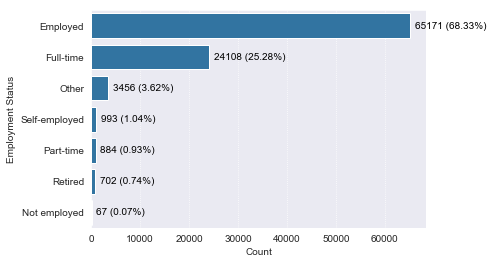

In [13]:
# profile of employment statuses of borrowers

# horizontal bar plot of number of listings for each employment status
employment_statuses = df.EmploymentStatus.value_counts().index
sns.countplot(data = df, y = 'EmploymentStatus', color = base_color
              , order = employment_statuses); # statuses in descending order of number of listings
plt.xlabel('Count')
plt.ylabel('Employment Status')

# retrieve locations of yticks
locs = plt.yticks()[0]

# number of listings in descending order for each status
status_counts = df.EmploymentStatus.value_counts()

for loc, status in zip(locs, employment_statuses):
    # number of listings for the given employment status
    status_count = status_counts[status]
    
    # calculate the proportion of the status in % [format: status count (proportion)]
    status_proportion = '{} ({:0.2f}%)'.format(status_count, 100*status_count/total_listings)
    
    # annotate the proportion of the state to the right of its corresponding bar
    plt.text(x = status_count + 1000, y = loc, s = status_proportion, va = 'center', color = 'black', fontsize = 10)

The majority of the borrowers who received loans from Prosper were "Employed", the proportion of which was 68.33%. Moreover, if the definition for this status of employment could be improved to include those who were employed full-time, then the proportion would have increased to approximately 95%. Borrowers who were either not employed or retired at the time their listings were created were less than 1% of all the borrowers in Prosper. Whether APRs for borrowers who were employed were significantly lower than those who were unemployed or whether APRs are strictly lower for those who were employed full-time than employees with other employment statuses would be worth investigating durig the bivariate exploration phase.

__1.2.5 Range of Borrower's Credit Score__

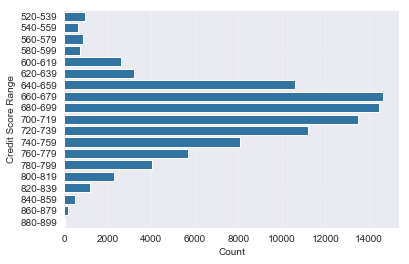

In [14]:
# profile of borrowers' credit score ranges

# horizontal bar plot of number of listings for each credit score range
sns.countplot(data = df, y = 'CreditScoreRange', color = base_color)
plt.xlabel('Count')
plt.ylabel('Credit Score Range');

The bar plot above suggests that the distribution of borrowers' credit score ranges provided by a consumer credit rating agency is approximately normal. The distribution is centered in the range of credit scores from 660 to 719. The center of this distribution overlaps with the range of credit scores from 670 to 739, which corresponds to a _Good_ credit score according to [_FICO Score 8 credit-scoring model_](https://www.creditkarma.com/advice/i/good-fico-score-range/). The lowest and the highest ranges of credit scores observed from the borrowers were from 520 to 539 and from 880 to 899, respectively.

#### 1.3 Discrete Data
Among the main features with quantitative data, four features with discrete data were first explored individually. The distribution of each of these variables was investigated with a histogram and a box plot. Because all these variables included _outliers_ or data which were either below the first quartile or above the third quartile by 1.5 times the inter-quartile range (IQR), their distributions were further explored with additional histograms focusing on the range of values which excludes the outliers. Also, two of these variables were further analyzed after transforming the data to a log scale.

__1.3.1 Duration of Empoyment Status__

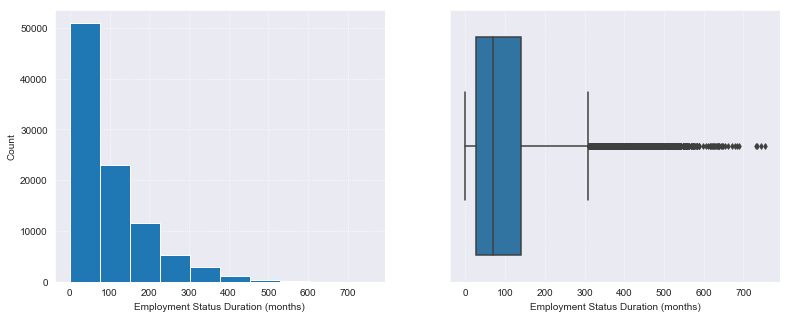

In [15]:
# distribution of lengths in months of employment statuses
plt.figure(figsize = (13, 5))

plt.subplot(1,2,1) # first of two subplots arranged in 1-by-2
plt.hist(data = df, x = 'EmploymentStatusDuration'); # histogram of lengths
plt.xlabel('Employment Status Duration (months)')
plt.ylabel('Count')

plt.subplot(1,2,2) # second of two subplots arranged in 1-by-2
sns.boxplot(data = df, x = 'EmploymentStatusDuration', fliersize = 4) # box plot of lengths
plt.xlabel('Employment Status Duration (months)');

Both the histogram and the box plot shown above illustrate that the distribution of the duration of the borrowers' employment statuses when their listings were created in Prosper is right-skewed. The number of borrowers exponentially decreased with longer duration of employment status. The majority of the borrowers' employment status lasted between 0 to less than 100 months or 9 years. In fact, this range includes the center of the distribution observed at approximately 75 months or 6 years.

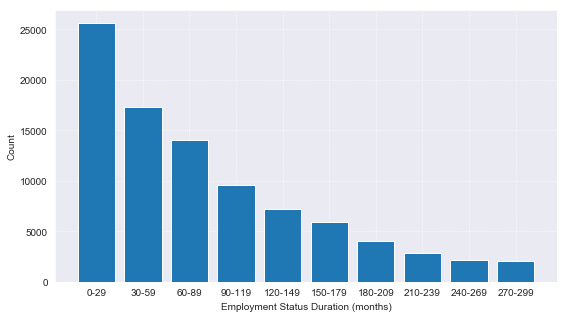

In [16]:
# employment status duration for approximately 1.5 times the IQR below and above IQR
plt.figure(figsize = (9, 5))

bins = np.arange(0, 300+30, 30) # 10 bins
plt.hist(data = df, x = 'EmploymentStatusDuration', bins = bins
         , rwidth = 0.8) # shrink width to indicate that the data is discrete

# specify and set locations and labels for xticks
locs = []
labels = []
for i in range(len(bins)):
    if i+1 < len(bins):
        locs.append(bins[i] + (bins[i+1]-bins[i])/2)
        labels.append(str(bins[i])+'-'+str(bins[i+1]-1))
plt.xticks(locs, labels)

plt.xlabel('Employment Status Duration (months)')
plt.ylabel('Count');

Even without the outliers, the distribution of borrowers' duration of employment statuses is right-skewed. The majority of the borrowers maintained their employment statuses for a period between 0 to 29 months. For every 30 months increase in the duration of employment status the number of borrowers observed exponentially decreased. This right-skewed distribution of employment status duration suggests that the demand for loans is greater for younger professionals with less than 5 years of work experience than for professionals with more years of work experience. How the purpose of borrowing money or the amount of loans vary with the duration of employment status need to be further investigated, however.

In [17]:
# transformation of employment status duration in log scale
log_data = np.log10(df.query('EmploymentStatusDuration > 0').EmploymentStatusDuration)
log_data.describe()

count    94185.000000
mean         1.755657
std          0.531102
min          0.000000
25%          1.447158
50%          1.845098
75%          2.149219
max          2.877947
Name: EmploymentStatusDuration, dtype: float64

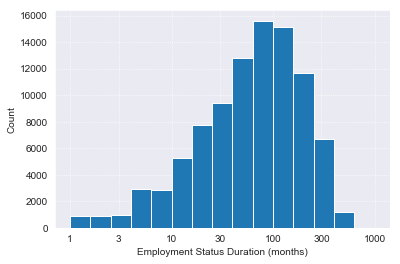

In [18]:
# distribution of employment status duration in log scale

# bin edges for log scale
log_binsize = 0.2 # selected after visually inspecting the distribution of the log scale data
log_bins = 10 ** np.arange(0, log_data.max()+log_binsize, log_binsize)

# histogram with x-axis in log scale
plt.hist(x = df.EmploymentStatusDuration, bins = log_bins)
plt.xscale('log')

# add custom labels for xticks
locs = [1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(loc) for loc in locs]
plt.xticks(locs, labels)

plt.xlabel('Employment Status Duration (months)')
plt.ylabel('Count');

Applying a log transformation to the duration of employment status reduced the degree of right-skewed distribution. However, because significantly small number of borrowers maintained their employment statuses for more than 300 months or 25 years, the distribution of the log-transformed data transformed was not normal.

__1.3.2 Number of Total Credit Lines in Past 7 Years__

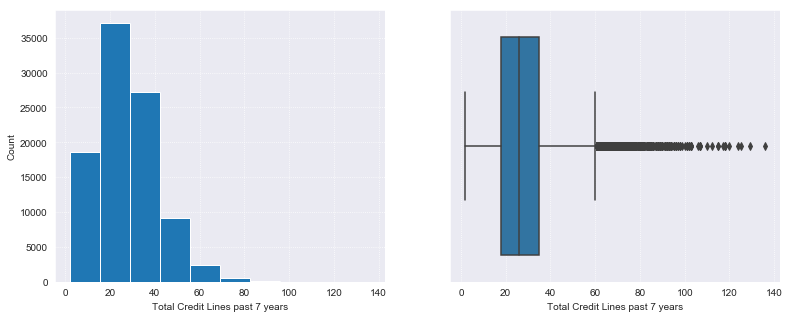

In [19]:
# distribution of credit lines
plt.figure(figsize = (13, 5))

plt.subplot(1,2,1) # second of two subplots arranged in 1-by-2
plt.hist(x = df.TotalCreditLinespast7years) # histogram with default bin size
plt.xlabel('Total Credit Lines past 7 years')
plt.ylabel('Count');

plt.subplot(1,2,2) # first of two subplots arranged in 1-by-2
sns.boxplot(data = df, x = 'TotalCreditLinespast7years') # box plot
plt.xlabel('Total Credit Lines past 7 years');

The histogram and the box plot shown above indicate that the distribution of borrowers' total numbers of credit lines for the past seven years when their listings were created are right-skewed with a median of approximately 25. The mode of the distribution was observed in the second bin which corresponds to an approximate range of total credit lines from 18 to 29 and accounts for around 37,500 listings. The frequency observed for this bin was nearly twice the frequency observed for the first bin. With increasing total number of credit lines from 29, fewer number of listings were observed.

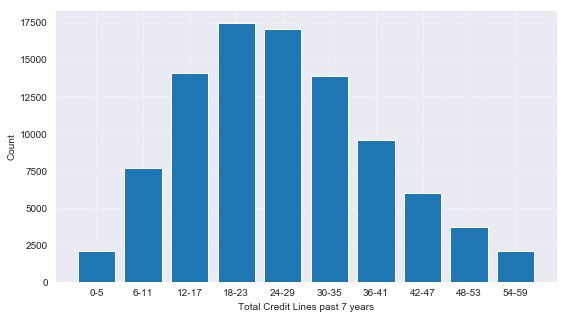

In [20]:
# credit lines for approximately 1.5 times the IQR below and above IQR
plt.figure(figsize = (9, 5))

bins = np.arange(0, 60+6, 6) # 10 bins
plt.hist(data = df, x = 'TotalCreditLinespast7years', bins = bins
         , rwidth = 0.8) # shrink width to indicate that the data is discrete

# specify and set locations and labels for xticks
locs = []
labels = []
for i in range(len(bins)):
    if i+1 < len(bins):
        locs.append(bins[i] + (bins[i+1]-bins[i])/2)
        labels.append(str(bins[i])+'-'+str(bins[i+1]-1))
plt.xticks(locs, labels)

plt.xlabel('Total Credit Lines past 7 years')
plt.ylabel('Count');

Further investigation of the distribution of the total number of credit lines from 0 to 59 confirmed the observations from exploring the data for the entire range. The distribution was still right-skewed with the range of credit lines from 18 to 29 accounting for the majority of the listings. The histogram above, however, shows that more listings were created for borrowers with credit lines ranging from 18 to 23 than those for borrowers with credit lines from 24 to 29.

In [21]:
# transformation of number of credit lines in log scale
log_data = np.log10(df.query('TotalCreditLinespast7years > 0').TotalCreditLinespast7years)
log_data.describe()

count    95381.000000
mean         1.375332
std          0.249795
min          0.301030
25%          1.255273
50%          1.414973
75%          1.544068
max          2.133539
Name: TotalCreditLinespast7years, dtype: float64

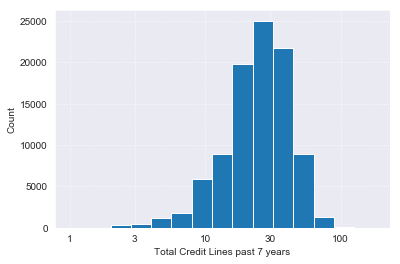

In [22]:
# distribution of number of credit lines in log scale

# bin edges for log scale
log_binsize = 0.15 # selected after visually inspecting the distribution of the log scale data
log_bins = 10 ** np.arange(0, log_data.max()+log_binsize, log_binsize)

# histogram with x-axis in log scale
plt.hist(x = df.TotalCreditLinespast7years, bins = log_bins)
plt.xscale('log')

# add custom labels for xticks
locs = [1, 3, 10, 30, 100]
labels = ['{}'.format(loc) for loc in locs]
plt.xticks(locs, labels)

plt.xlabel('Total Credit Lines past 7 years')
plt.ylabel('Count');

Applying the log transformation resulted in a distribution that is less skewed. However, with significantly small number of listings created for borrowers with large number of credit lines, the distribution shown above is not approximately normal.

__1.3.3 Number of Total Inquiries__

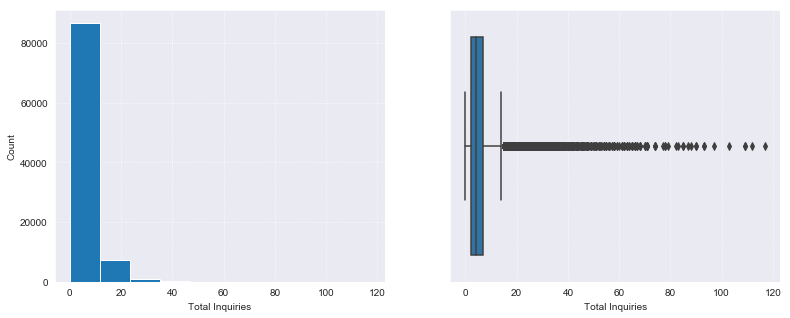

In [23]:
# distribution of total inquiries
plt.figure(figsize = (13, 5))

plt.subplot(1,2,1) # second of two subplots arranged in 1-by-2
plt.hist(data = df, x = 'TotalInquiries') # histogram with default bin size
plt.xlabel('Total Inquiries')
plt.ylabel('Count');

plt.subplot(1,2,2) # first of two subplots arranged in 1-by-2
sns.boxplot(data = df, x = 'TotalInquiries') # box plot
plt.xlabel('Total Inquiries');

The default bin size used for generating the histogram above was unable to capture the distribution of the total number of inquiries on file at the time when the borrower's credit profile was pulled especially for listings created for borrowers with approximately 11 or less than 11 inquiries. Although both the histogram and the box plot suggested that the distribution is right-skewed, the existence of a relatively large number of outliers called for an investigation of the distribution of data from 0 to approximately 20 total inquiries.

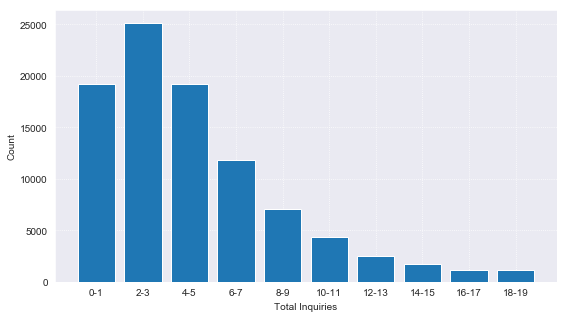

In [24]:
# total inquiries for approximately 1.5 times the IQR below and above IQR
plt.figure(figsize = (9, 5))

bins = np.arange(0, 20+2, 2) # 10 bins
plt.hist(data = df, x = 'TotalInquiries', bins = bins
         , rwidth = 0.8) # shrink width to indicate that the data is discrete

# specify and set locations and labels for xticks
locs = []
labels = []
for i in range(len(bins)):
    if i+1 < len(bins):
        locs.append(bins[i] + (bins[i+1]-bins[i])/2)
        labels.append(str(bins[i])+'-'+str(bins[i+1]-1))
plt.xticks(locs, labels)

plt.xlabel('Total Inquiries')
plt.ylabel('Count');

Exploration of the total number of inquiries ranging from 0 to 19 revealed that the distribution is right-skewed with most listings observed for two and three total inquiries. The next most commonly observed listings had either zero and one total inquiry or four and five total inquiries. The number of listings created exponentially decreased from 25,000 listings for two and three total inquiries to approximately 1,000 listings for 18 and 19 total inquiries.

Log transformation was not applied to this variable because doing so would require all listings created for borrowers with no total inquiry to be removed. As noted above, relatively large number of listings was observed for the first bin. Also, because the range of values excluding the outliers was less than a sixth of the entire range of values including the outliers, the histogram above was deemed to be sufficient for analyzing the distribution of this feature.

__1.3.4 Number of Delinquencies Last 7 Years__

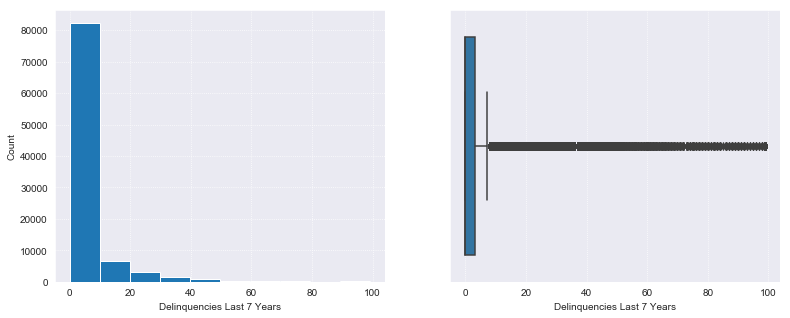

In [25]:
# distribution of number of delinquencies
plt.figure(figsize = (13, 5))

plt.subplot(1,2,1) # second of two subplots arranged in 1-by-2
plt.hist(data = df, x = 'DelinquenciesLast7Years') # histogram with default bin size
plt.xlabel('Delinquencies Last 7 Years')
plt.ylabel('Count');

plt.subplot(1,2,2) # first of two subplots arranged in 1-by-2
sns.boxplot(data = df, x = 'DelinquenciesLast7Years') # box plot
plt.xlabel('Delinquencies Last 7 Years');

Both plots above especially the box plot suggested that the distribution of the number of delinquencies for the past seven years at the time the borrower's credit profile was pulled is highly right-skewed. Because the first bin accounted for approximately 80,000 listings, the distribution of the data in this bin was further analyzed.

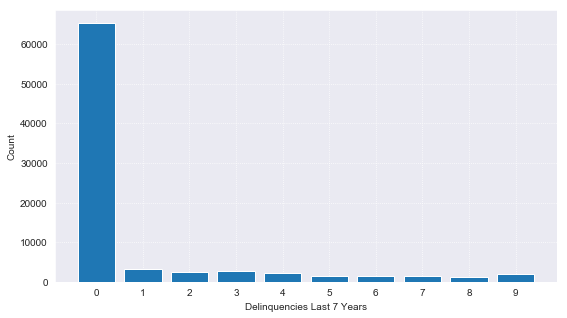

In [26]:
# number of delinquencies for approximately 1.5 times the IQR below and above IQR
plt.figure(figsize = (9, 5))

bins = np.arange(0, 10+1, 1) # 10 bins
plt.hist(data = df, x = 'DelinquenciesLast7Years', bins = bins
         , rwidth = 0.8) # shrink width to indicate that the data is discrete

# specify and set locations and labels for xticks
locs = []
labels = []
for i in range(len(bins)):
    if i+1 < len(bins):
        locs.append(bins[i] + (bins[i+1]-bins[i])/2)
        labels.append(bins[i])
plt.xticks(locs, labels)

plt.xlabel('Delinquencies Last 7 Years')
plt.ylabel('Count');

The above plot indicated that the majority of the listings were for borrowers with no delinquency in the past seven years. In fact, the observed frequency of approximately 65,000 listings was significantly larger than the sum of the frequencies observed for one or more delinquencies in the past seven years. Whether no record of delinquency is associated with a relatively low APR or whether an increase in the number of delinquencies is associated with a notable change in the APR are worth the investigation in the bivariate exploration.

### 1.4 Continuous Data
Similar to the univariate exploration of features with discrete data, histogram and box plot were used for the univariate exploration of features with continuous data. After the identification of outliers, the subset of the data for each variable, excluding the outliers, was used to further analyze its distribution with a histogram.

__1.4.1 Bankcard Utilization Rate__

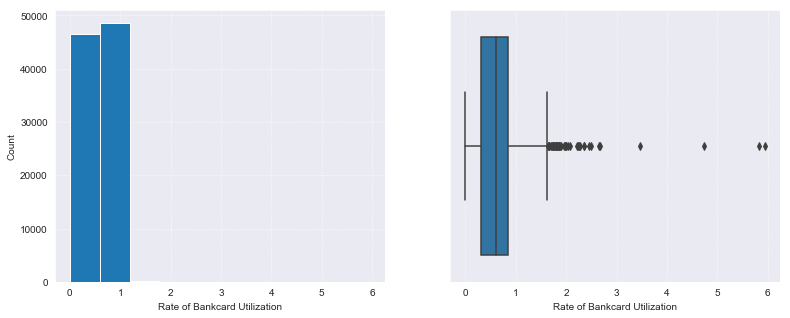

In [27]:
# distribution of bank card utilization rates
plt.figure(figsize = (13, 5))

plt.subplot(1,2,1) # first of two subplots arranged in 1-by-2
plt.hist(data = df, x = 'BankcardUtilization'); # histogram of rates
plt.xlabel('Rate of Bankcard Utilization')
plt.ylabel('Count')

plt.subplot(1,2,2) # second of two subplots arranged in 1-by-2
sns.boxplot(data = df, x = 'BankcardUtilization') # box plot of rates
plt.xlabel('Rate of Bankcard Utilization');

According to the box plot, the distribution must be right-skewed because the median of the distribution, approximately 0.7, is closer to the minimum observed value. However, because the histogram suggested that the amount of credit used did not exceed the available revolving credit for almost all of the borrowers, the distribution of bankcard utilization rates for the first two bins were further analyzed.

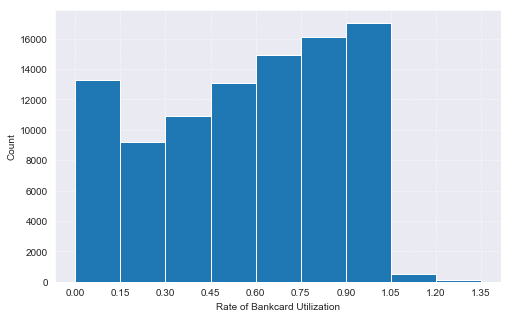

In [28]:
# bank card utilization rates for approximately 1.5 times the IQR below and above IQR
plt.figure(figsize = (8, 5))

bins = np.arange(0, 1.35+0.15, 0.15)
plt.hist(data = df, x = 'BankcardUtilization', bins = bins)

# specify and set locations and labels for xticks
locs = bins
labels = ['{:0.2f}'.format(bin_edge) for bin_edge in bins]
plt.xticks(locs, labels)

plt.xlabel('Rate of Bankcard Utilization')
plt.ylabel('Count');

According to the histogram above, approximately 13,000 listings were created for borrowers who used less than 0.15 of their available revolving credit. Although the number of listings decreased to approximately 9,000 for the next 0.15 increase in the bankcard utilization rate, the number of listings consistently increased to approximately 17,000 for borrowers who used nearly all of their available revolving credit. For rates larger than 1.05 or for borrowers who used more than the available credit the number of listings significantly dropped.

__1.4.2 Debt to Income Ratio__

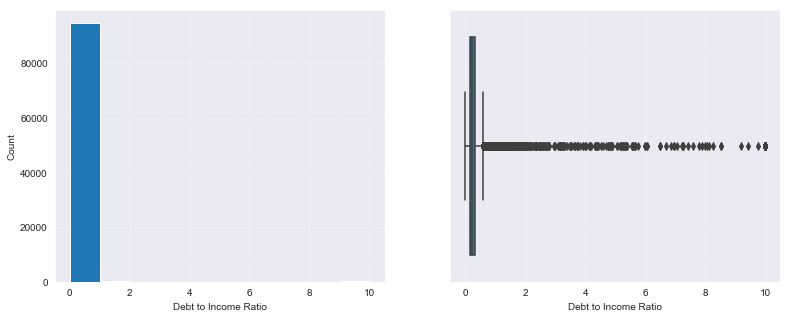

In [29]:
# distribution of debt to income ratios
plt.figure(figsize = (13, 5))

plt.subplot(1,2,1) # first of two subplots arranged in 1-by-2
plt.hist(data = df, x = 'DebtToIncomeRatio'); # histogram of ratios
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count')

plt.subplot(1,2,2) # second of two subplots arranged in 1-by-2
sns.boxplot(data = df, x = 'DebtToIncomeRatio') # box plot of ratios
plt.xlabel('Debt to Income Ratio');

According to the box plot, only the first 10% of the entire range of observed values for the borrowers' debt to income ratio from approximately 0 to 10 accounted for non-outliers. Also, the histogram showed that nearly all listings were created for borrowers whose debt did not exceed their income. These two observations called for a further analysis of the distribution of data excluding the outliers.

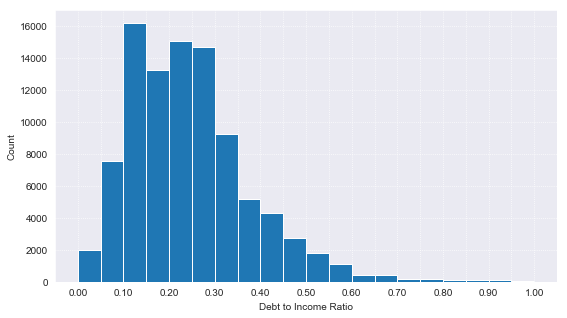

In [30]:
# debt to income ratios for approximately 1.5 times the IQR below and above IQR
plt.figure(figsize = (9, 5))

bins = np.arange(0, 1+0.05, 0.05)
plt.hist(data = df, x = 'DebtToIncomeRatio', bins = bins)

# specify and set locations and labels for xticks
locs = bins
labels = []
for i, bin_edge in enumerate(bins):
    if i % 2 == 0: # for every two bin edges
        labels.append('{:0.2f}'.format(bin_edge))
    else:
        labels.append('')
plt.xticks(locs, labels)

plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count');

The distribution of the debt to income ratios ranging from 0 to 1 was right-skewed with most of the listings observed for ratios from 0.10 to 0.15. Because approximately half of all listings were for consolidating debt and almost all listings were for borrowers with debt to income ratios less than 1, borrowers who sought to consolidate debts must have applied for loans in Prosper before their debt exceeded their income.

__1.4.3 Stated Monthly Income__

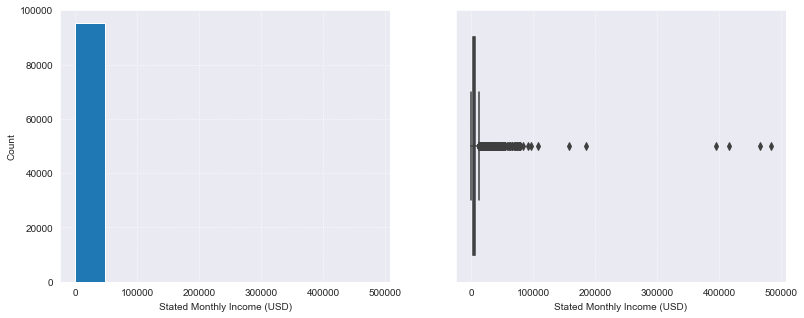

In [31]:
# distribution of monthly incomes
plt.figure(figsize = (13, 5))

plt.subplot(1,2,1) # first of two subplots arranged in 1-by-2
plt.hist(data = df, x = 'StatedMonthlyIncome'); # histogram of incomes
plt.xlabel('Stated Monthly Income (USD)')
plt.ylabel('Count')

plt.subplot(1,2,2) # second of two subplots arranged in 1-by-2
sns.boxplot(data = df, x = 'StatedMonthlyIncome') # box plot of incomes
plt.xlabel('Stated Monthly Income (USD)');

According to the histogram, nearly all listings were for borrowers with a monthly income less than \\$50,000. In fact, the upper bound of stated monthly incomes excluding the outliers was less than half of \\$50,000. This observation motivated the analysis of the distribution of monthly incomes excluding the outliers.

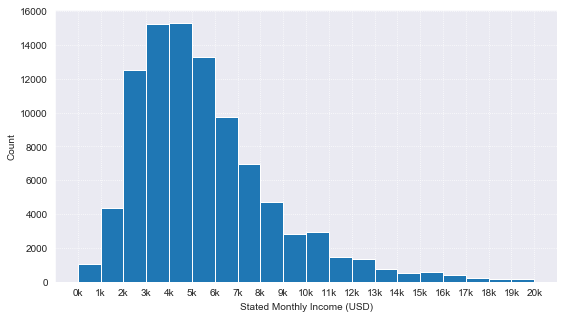

In [32]:
# monthly incomes for approximately 1.5 times the IQR below and above IQR
plt.figure(figsize = (9, 5))

bins = np.arange(0, 20000+1000, 1000)
plt.hist(data = df, x = 'StatedMonthlyIncome', bins = bins)

# # specify and set locations and labels for xticks
locs = bins
labels = ['{:.0f}k'.format(bin_edge/1000) for bin_edge in bins]
plt.xticks(locs, labels)

plt.xlabel('Stated Monthly Income (USD)')
plt.ylabel('Count');

The distribution of the borrowers' stated monthly incomes was right-skewed. Bulk of the listings were for borrowers with monthly incomes between \\$2,000 and \\$6,000. The center of the distribution hints a possiblity of a vicious cycle in which individuals with relatively low incomes seek for loans which in turn may put them in a worse financial position. This potentially undesirable outcome may be worse if these borrowers are from a location with high costs of living such as California, the state for which approximately half of all listings were created.

__1.4.4 Original Loan Amount__

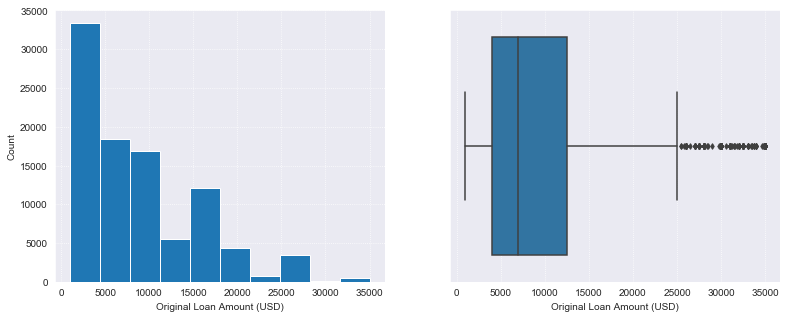

In [33]:
# distribution of loan amounts
plt.figure(figsize = (13, 5))

plt.subplot(1,2,1) # first of two subplots arranged in 1-by-2
plt.hist(data = df, x = 'LoanOriginalAmount'); # histogram of loan amounts
plt.xlabel('Original Loan Amount (USD)')
plt.ylabel('Count')

plt.subplot(1,2,2) # second of two subplots arranged in 1-by-2
sns.boxplot(data = df, x = 'LoanOriginalAmount', fliersize = 4) # box plot of loan amounts
plt.xlabel('Original Loan Amount (USD)');

The box plot of the original amount of loans suggested that the distribution is right-skewed with the center observed at approximately \\$7,000. However, the histogram did not show a gradual decrease in the observed frequency with increasing amount of loans. For instance, the observed frequencies for the fifth and the eighth bins were larger than two times the frequencies of the previous bins.

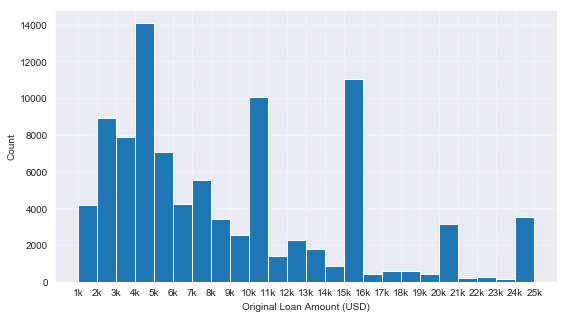

In [34]:
# loan amounts for approximately 1.5 times the IQR below and above IQR
plt.figure(figsize = (9, 5))

bins = np.arange(df.LoanOriginalAmount.min(), 25000+1000, 1000)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)

# specify and set locations and labels for xticks
locs = bins
labels = ['{:.0f}k'.format(bin_edge/1000) for bin_edge in bins]
plt.xticks(locs, labels)

plt.xlabel('Original Loan Amount (USD)')
plt.ylabel('Count');

The irregularity in the distribution of the original amount of loans was accentuated by the histogram above which plotted the distribution of the original loan amount ranging from \\$1,000 to \\$25,000. Although the overall distribution appeared to be right-skewed, peaks were observed in non-adjacent bins such as 14,000 listings for loans between \\$4,000 and \\$5,000, 11,000 listings for loans between \\$15,000 and \\$16,000 and 10,000 listings for loans between \\$10,000 and \\$11,000.

### 2. Bivariate Exploration

#### 2.1 Borrower's APR vs. Categorical Variables

__2.1.1 Borrower's APR vs. Term__

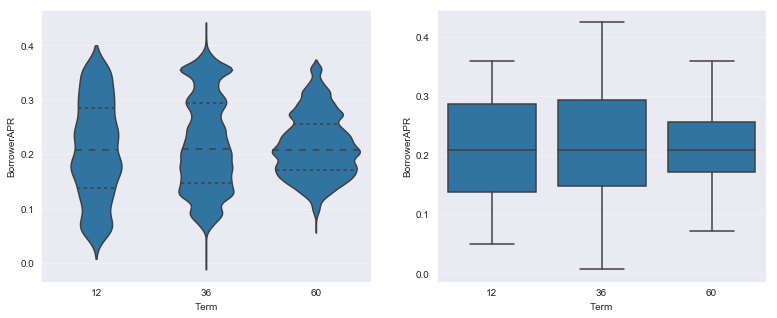

In [35]:
# distribution of borrower's APR by loan terms
plt.figure(figsize = (13, 5))

# violin plot
plt.subplot(1,2,1) # first of two subplots arranged in 1-by-2
sns.violinplot(data = df, x = 'Term', y = 'BorrowerAPR', color = base_color
               , scale = 'area' # scale violin width so that each violin has the same area
               , inner = 'quartile') # indicate 1st, 2nd, and 3rd quartiles

# box plot
plt.subplot(1,2,2) # second of two subplots arranged in 1-by-2
sns.boxplot(data = df, x = 'Term', y = 'BorrowerAPR', color = base_color);

__2.1.2 Borrower's APR vs. Listing Category__

In [36]:
# sub-dataset including borrower's APR and listing categories
df_listingcategory = df[['BorrowerAPR', 'ListingCategory']]
df_listingcategory = df_listingcategory.copy()

# custom function for checking loan types
    # input: listing category code
    # output: listing category description
    # checks for only the four types for which most listings were observed 
def check_loantype(x):
    if x == 1:
        return category_dict[1] # Debt Consolidation
    elif x == 2:
        return category_dict[2] # Home Improvement
    elif x == 3:
        return category_dict[3] # Business
    elif x == 6:
        return category_dict[6] # Auto
    else:
        return category_dict[7] # Other

# apply custom function and list loan type description under a new column 
df_listingcategory['LoanType'] = df_listingcategory['ListingCategory'].apply(check_loantype)
df_listingcategory.head()

,BorrowerAPR,ListingCategory,LoanType
0,0.16516,0,Other
1,0.12016,2,Home Improvement
2,0.12528,16,Other
3,0.24614,2,Home Improvement
4,0.15425,1,Debt Consolidation


In [37]:
# ordered list of unique values in LoanType
loantypes = ['Debt Consolidation', 'Home Improvement', 'Business', 'Auto', 'Other']

# convert data type of LoanType to (ordinal) category
loan_types = pd.api.types.CategoricalDtype(ordered = True, categories = loantypes)
df_listingcategory['LoanType'] = df_listingcategory['LoanType'].astype(loan_types)

# verify that data type of LoanType is (ordinal) category
df_listingcategory['LoanType'].dtype

CategoricalDtype(categories=['Debt Consolidation', 'Home Improvement', 'Business', 'Auto',
                  'Other'],
                 ordered=True)

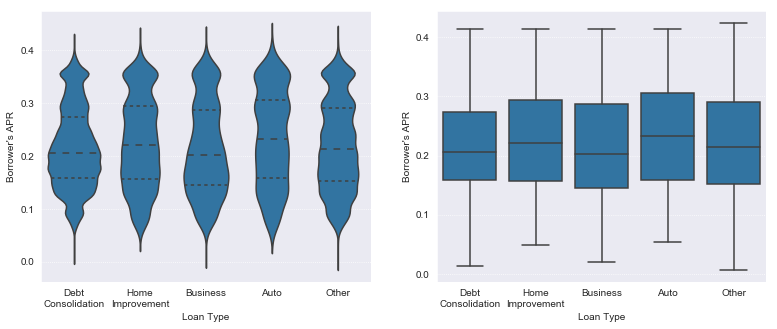

In [38]:
# distribution of borrower's APR by listing categories
plt.figure(figsize = (13, 5))

# violin plot
plt.subplot(1,2,1) # first of two subplots arranged in 1-by-2
sns.violinplot(data = df_listingcategory, x = 'LoanType', y = 'BorrowerAPR'
               , color = base_color, scale = 'area', inner = 'quartile')

# update xtick labels
locs = plt.xticks()[0] # retrieve current xtick locations
labels = [loantype.replace(' ', '\n') for loantype in loantypes] # replace ' ' with '\n' to reduce label width
plt.xticks(locs, labels)

# update axes labels
plt.xlabel('Loan Type')
plt.ylabel('Borrower\'s APR')

# box plot
plt.subplot(1,2,2) # second of two subplots arranged in 1-by-2
sns.boxplot(data = df_listingcategory, x = 'LoanType', y = 'BorrowerAPR', color = base_color);
plt.xticks(locs, labels)
plt.xlabel('Loan Type')
plt.ylabel('Borrower\'s APR');

__2.1.3 Borrower's APR vs. Borrower State__

In [39]:
# sub-dataset including borrower's APR and state address
df_state = df[['BorrowerAPR', 'BorrowerState']]
df_state = df_state.copy()

# custom function for checking state
    # input, output: state code
    # checks for only the seven states for which most listings were observed 
top_states = ['CA', 'NY', 'FL', 'TX', 'IL', 'GA' , 'OH']
def check_state(x):
    if x not in top_states:
        return 'Other'
    else:
        return x

# apply custom function and list state code under a new column 
df_state['State'] = df_state['BorrowerState'].apply(check_state)
df_state.head()

,BorrowerAPR,BorrowerState,State
0,0.16516,CO,Other
1,0.12016,CO,Other
2,0.12528,GA,GA
3,0.24614,MN,Other
4,0.15425,NM,Other


In [40]:
# ordered list of states in State
states = top_states.copy()
states.append('Other')

# convert data type of State to (ordinal) category
category_states = pd.api.types.CategoricalDtype(ordered = True, categories = states)
df_state['State'] = df_state['State'].astype(category_states)

# verify that data type of State is (ordinal) category
df_state['State'].dtype

CategoricalDtype(categories=['CA', 'NY', 'FL', 'TX', 'IL', 'GA', 'OH', 'Other'], ordered=True)

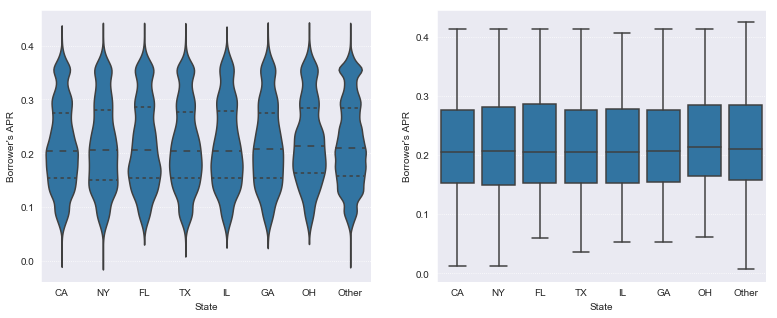

In [41]:
# distribution of borrower's APR by states
plt.figure(figsize = (13, 5))

# violin plot
plt.subplot(1,2,1) # first of two subplots arranged in 1-by-2
sns.violinplot(data = df_state, x = 'State', y = 'BorrowerAPR'
               , color = base_color, scale = 'area', inner = 'quartile')

# update xtick labels
locs = plt.xticks()[0] # retrieve current xtick locations
labels = states # ordered list of states in State
plt.xticks(locs, labels)

# update axes labels
plt.xlabel('State')
plt.ylabel('Borrower\'s APR')

# box plot
plt.subplot(1,2,2) # second of two subplots arranged in 1-by-2
sns.boxplot(data = df_state, x = 'State', y = 'BorrowerAPR', color = base_color);
plt.xticks(locs, labels)
plt.xlabel('State')
plt.ylabel('Borrower\'s APR');

__2.1.4 Borrower's APR vs. Credit Score Range__

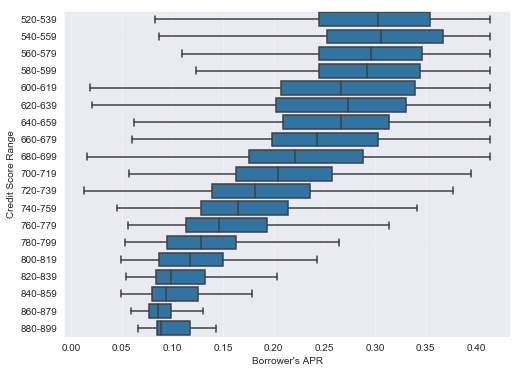

In [42]:
# distribution of borrower's APR by credit score range
plt.figure(figsize = (8, 6))

sns.boxplot(data = df, y = 'CreditScoreRange', x = 'BorrowerAPR', color = base_color
            , showfliers = False) # remove outliers from the plot
plt.ylabel('Credit Score Range')
plt.xlabel('Borrower\'s APR');

#### 2.2 Borrower's APR vs. Quantitative Variables

In [43]:
# Lists of quantitative variables separated by data types
discrete_var = ['EmploymentStatusDuration', 'TotalCreditLinespast7years', 'TotalInquiries', 'DelinquenciesLast7Years']
continuous_var = ['BankcardUtilization', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount']

In [44]:
# sampling of 500 listings to expedite rendering of visuals
samples = np.random.choice(df.shape[0], 500, replace = False)
df_samp = df.loc[samples,:]

__2.2.1 Borrower's APR vs. Discrete Data__

In [45]:
# add borrower APR to the list of discrete variables 
discrete_var_apr = discrete_var.copy()
discrete_var_apr.append('BorrowerAPR')

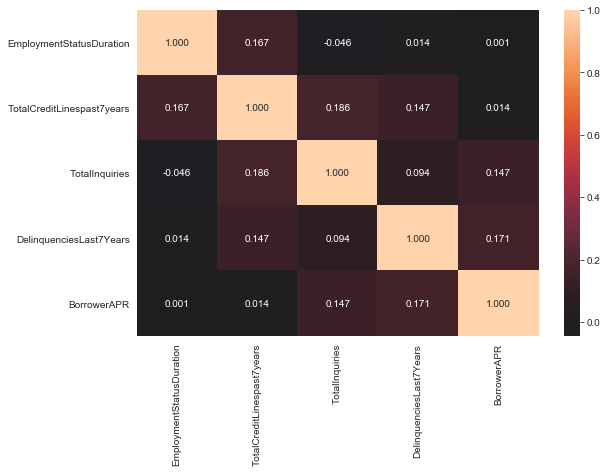

In [46]:
# heatmap of correlations between APR and discrete data
plt.figure(figsize = (9, 6))
sns.heatmap(df[discrete_var_apr].corr(), annot = True, fmt = '.3f', center = 0);

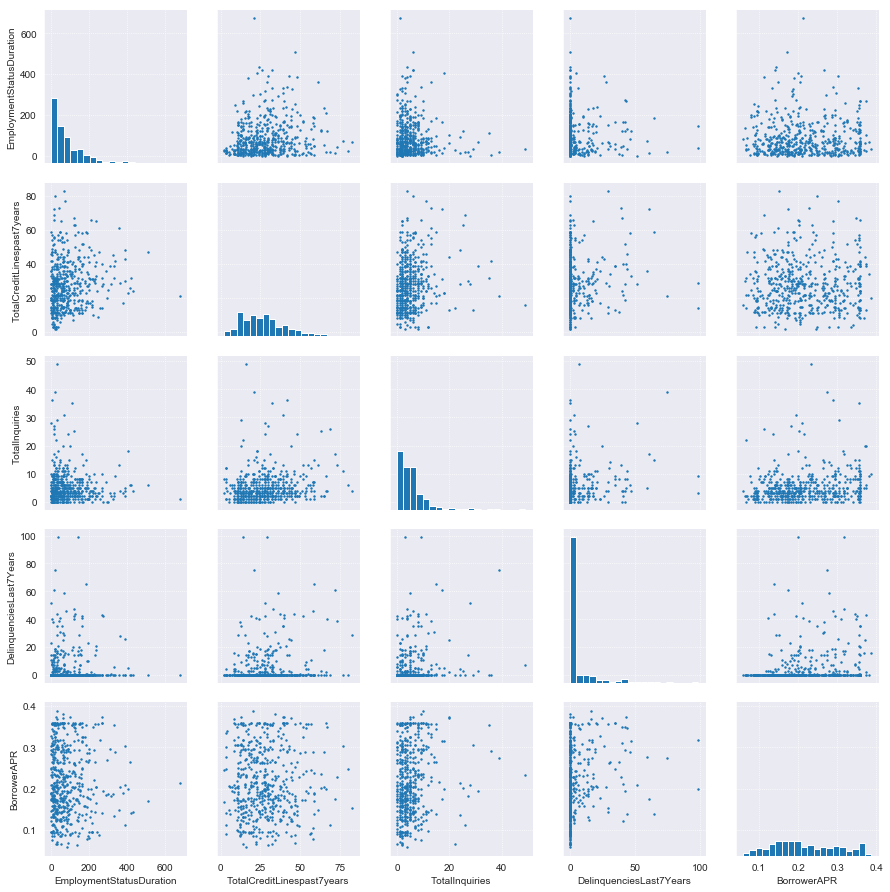

In [47]:
# matrix of scatter plots for APR vs. discrete data
g = sns.PairGrid(data = df_samp, vars = discrete_var_apr)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter, s = 2);

__2.2.2 Borrower's APR vs. Continuous Data__

In [48]:
# add borrower APR to the list of continuous variables 
continuous_var_apr = continuous_var.copy()
continuous_var_apr.append('BorrowerAPR')

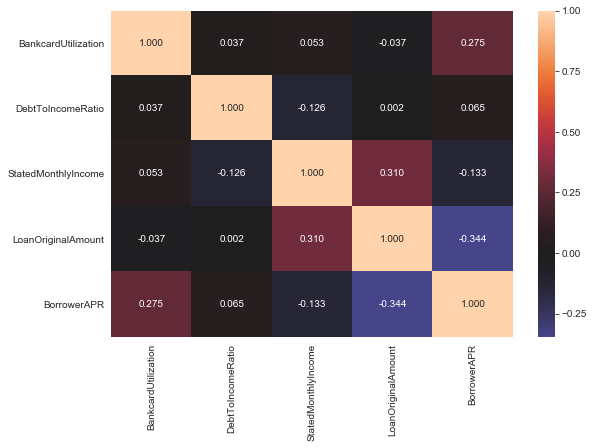

In [49]:
# heatmap of correlations between APR and continuous data
plt.figure(figsize = (9, 6))
sns.heatmap(df[continuous_var_apr].corr(), annot = True, fmt = '.3f', center = 0);

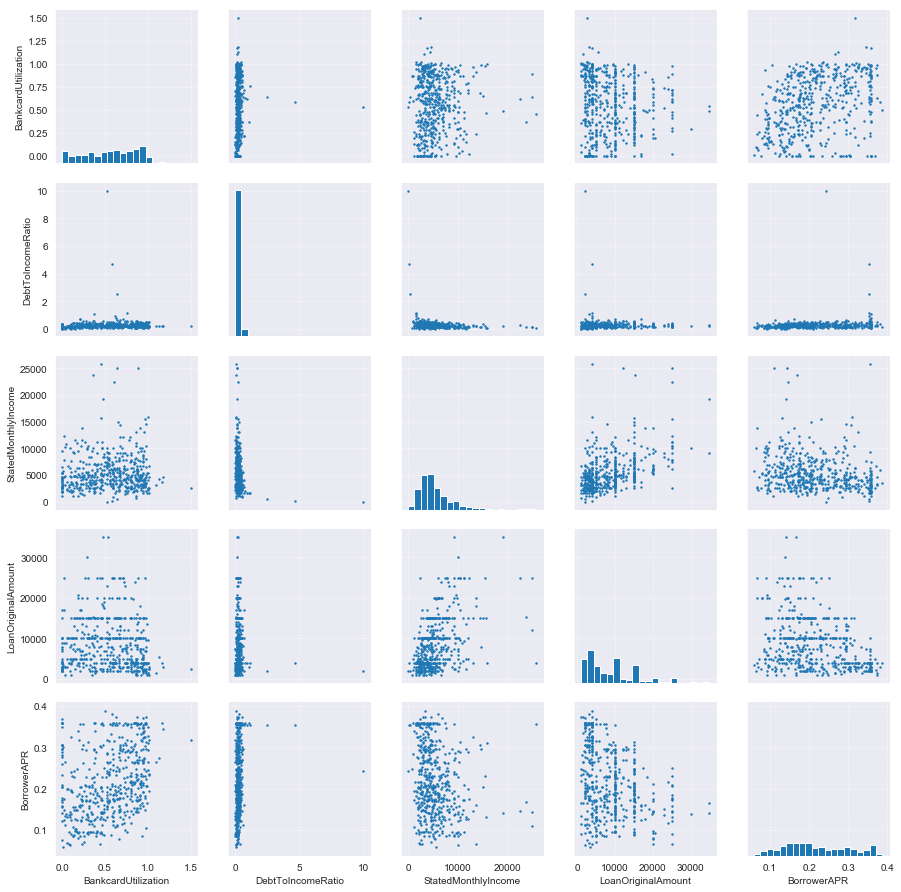

In [50]:
# matrix of scatter plots for APR vs. continuous data
g = sns.PairGrid(data = df_samp, vars = continuous_var_apr)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter, s = 2);

#### 2.3 Term vs. Quantitative Variables

__2.3.1 Term vs. Discrete Data__

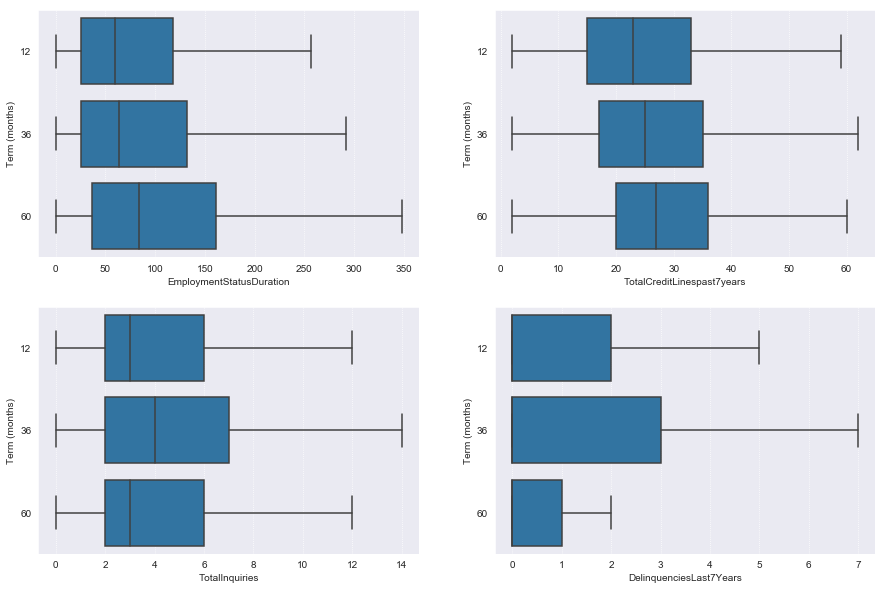

In [51]:
# distribution of each discrete data by term
plt.figure(figsize = (15, 10))

for i in range(len(discrete_var)):
    plt.subplot(2, 2, i+1) # one subplot for each type of discrete data
    sns.boxplot(data = df, y = 'Term', x = discrete_var[i], color = base_color, showfliers = False)
    plt.ylabel('Term (months)')
    plt.xlabel(discrete_var[i]);

__2.3.2 Term vs. Continuous Data__

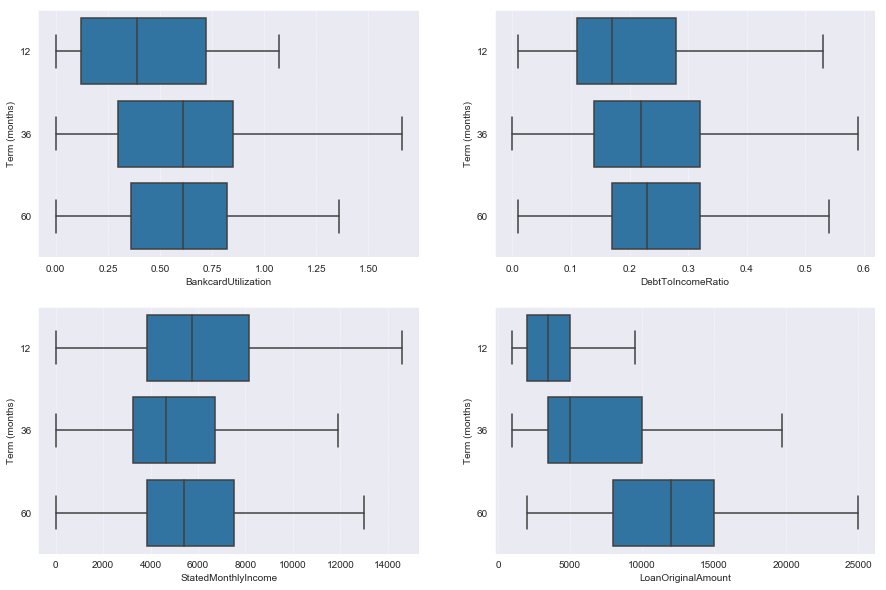

In [52]:
# distribution of each continuous data by term
plt.figure(figsize = (15, 10))

for i in range(len(continuous_var)):
    plt.subplot(2, 2, i+1) # one subplot for each type of continuous data
    sns.boxplot(data = df, y = 'Term', x = continuous_var[i], color = base_color, showfliers = False)
    plt.ylabel('Term (months)')
    plt.xlabel(continuous_var[i]);

#### 2.4 Credit Score Range vs. Quantitative Variables

__2.4.1 Credit Score Range vs. Discrete Data__

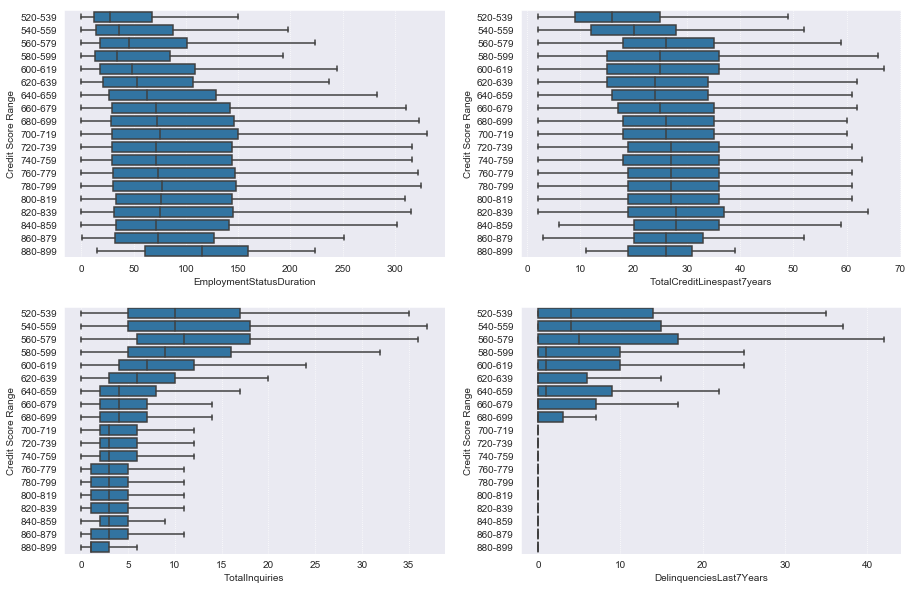

In [53]:
# distribution of each discrete data by credit score range
plt.figure(figsize = (15, 10))

for i in range(len(discrete_var)):
    plt.subplot(2, 2, i+1) # one subplot for each type of discrete data
    sns.boxplot(data = df, y = 'CreditScoreRange', x = discrete_var[i], color = base_color, showfliers = False)
    plt.ylabel('Credit Score Range')
    plt.xlabel(discrete_var[i]);

__2.4.2 Credit Score Range vs. Continuous Data__

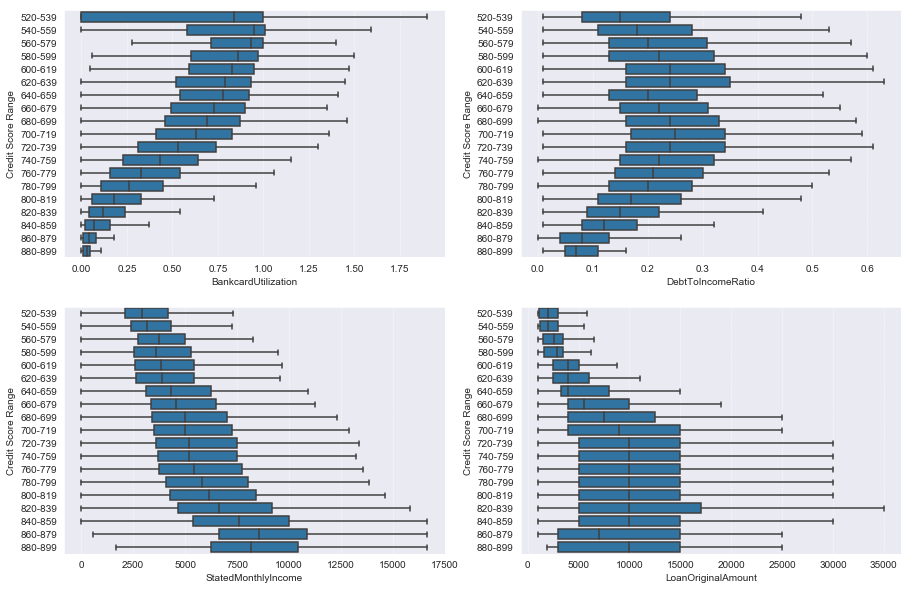

In [54]:
# distribution of each continuous data by credit score range
plt.figure(figsize = (15, 10))

for i in range(len(continuous_var)):
    plt.subplot(2, 2, i+1) # one subplot for each type of continuous data
    sns.boxplot(data = df, y = 'CreditScoreRange', x = continuous_var[i], color = base_color, showfliers = False)
    plt.ylabel('Credit Score Range')
    plt.xlabel(continuous_var[i]);

### 3. Multivariate Exploration